In [2]:
import numpy as np
import matplotlib.pyplot as plt
import csv
import os
import pandas as pd

In [3]:
files = [
  "Am.csv",
  "Background.csv",
  "Co.csv",
  "Cs.csv",
  "Eu.csv",
  "Na.csv",
]
for i in range(len(files)):
  files[i] = 'src/csv/' + files[i]

frames = dict()
for file in files:
  name = f"${os.path.basename(file).split('.')[0]}$"
  frames[file] = pd.read_csv(file, sep=';', header=None, names=[name], index_col=0)
  frames[file].index.name = "Channel"
frames[files[3]]

,$Cs$
Channel,
1,0
2,1
3,0
4,1
5,0
...,...
2044,0
2045,0
2046,0


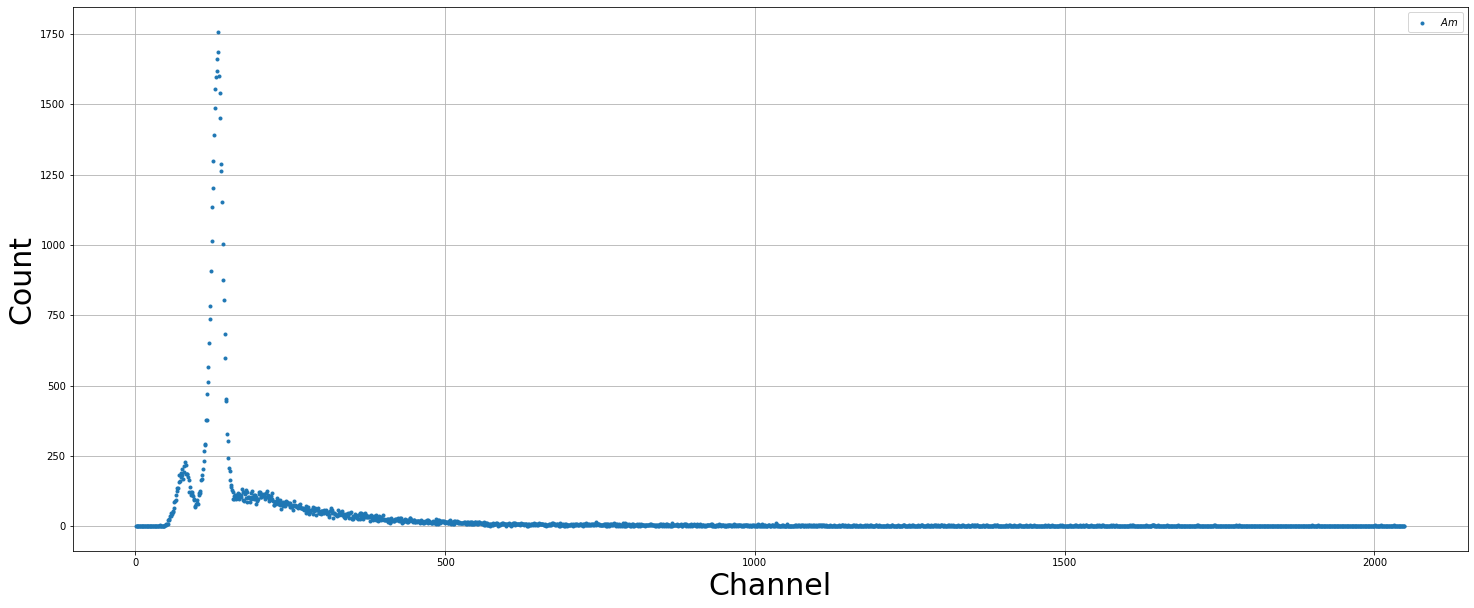

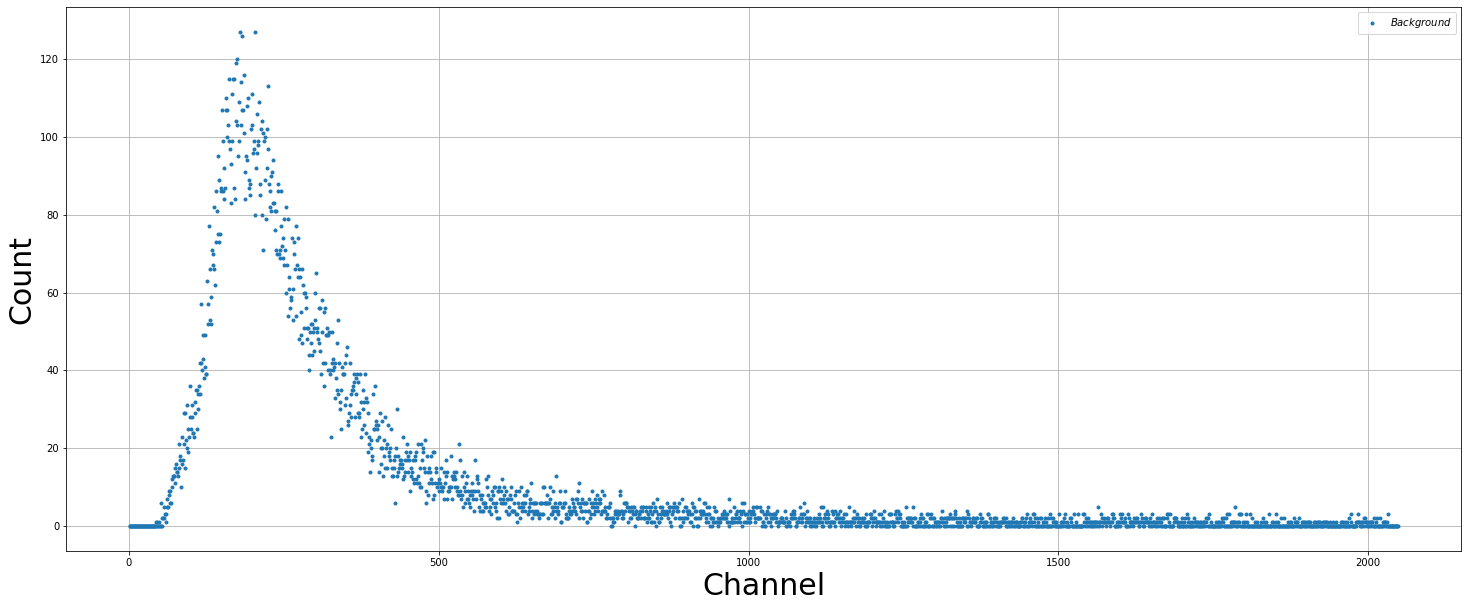

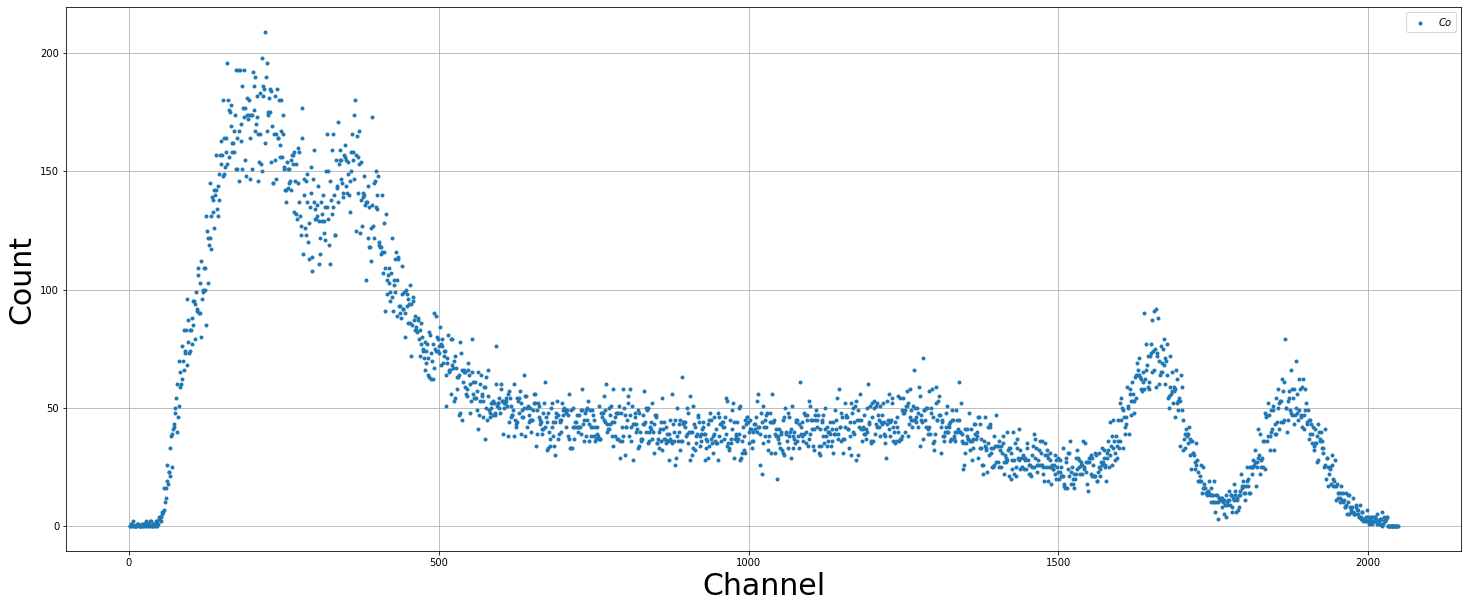

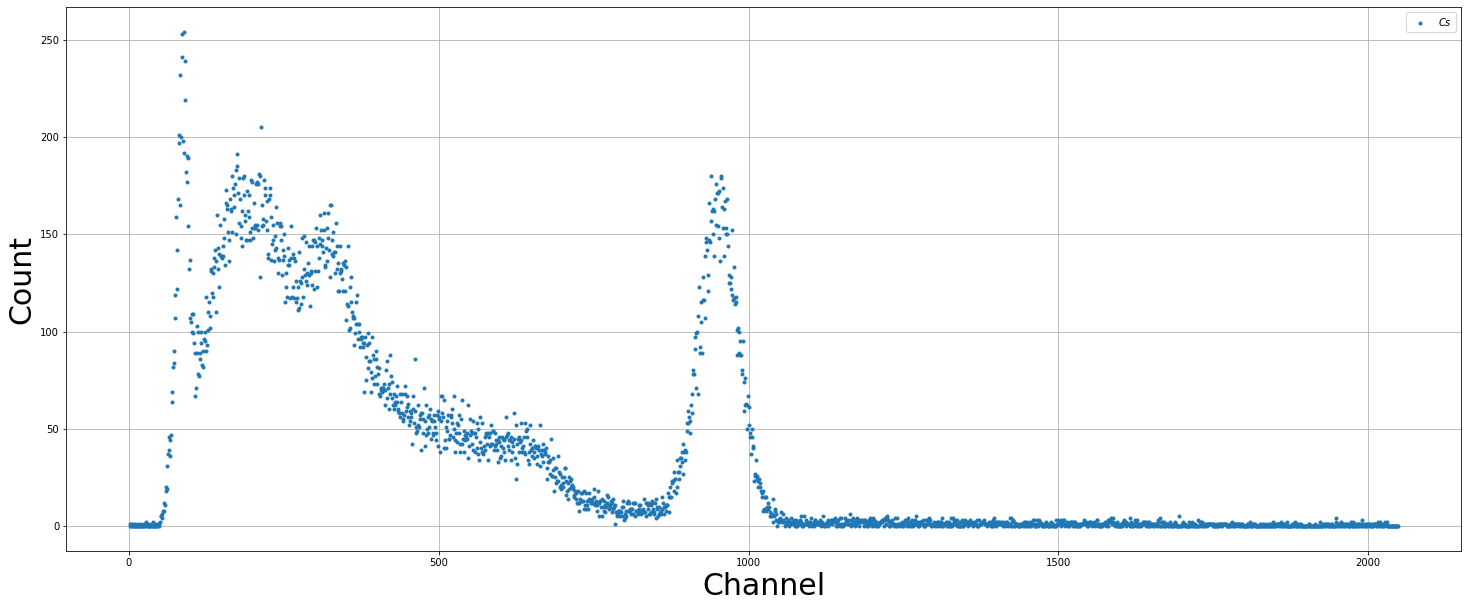

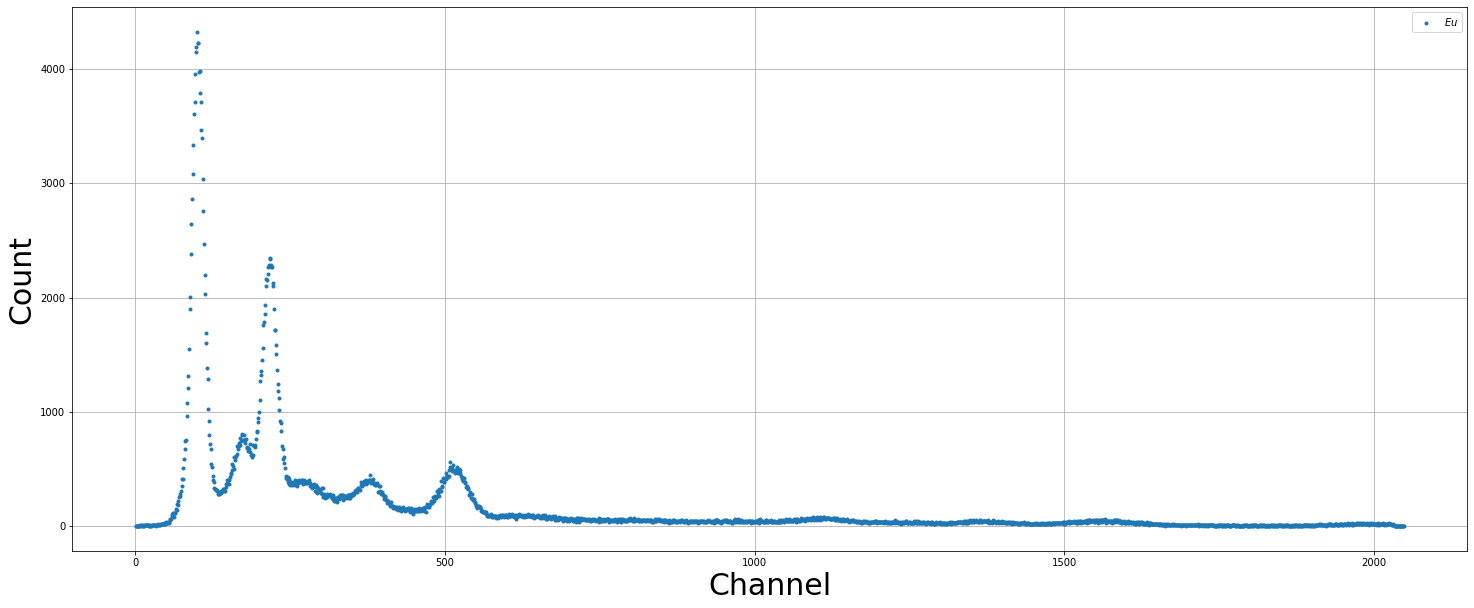

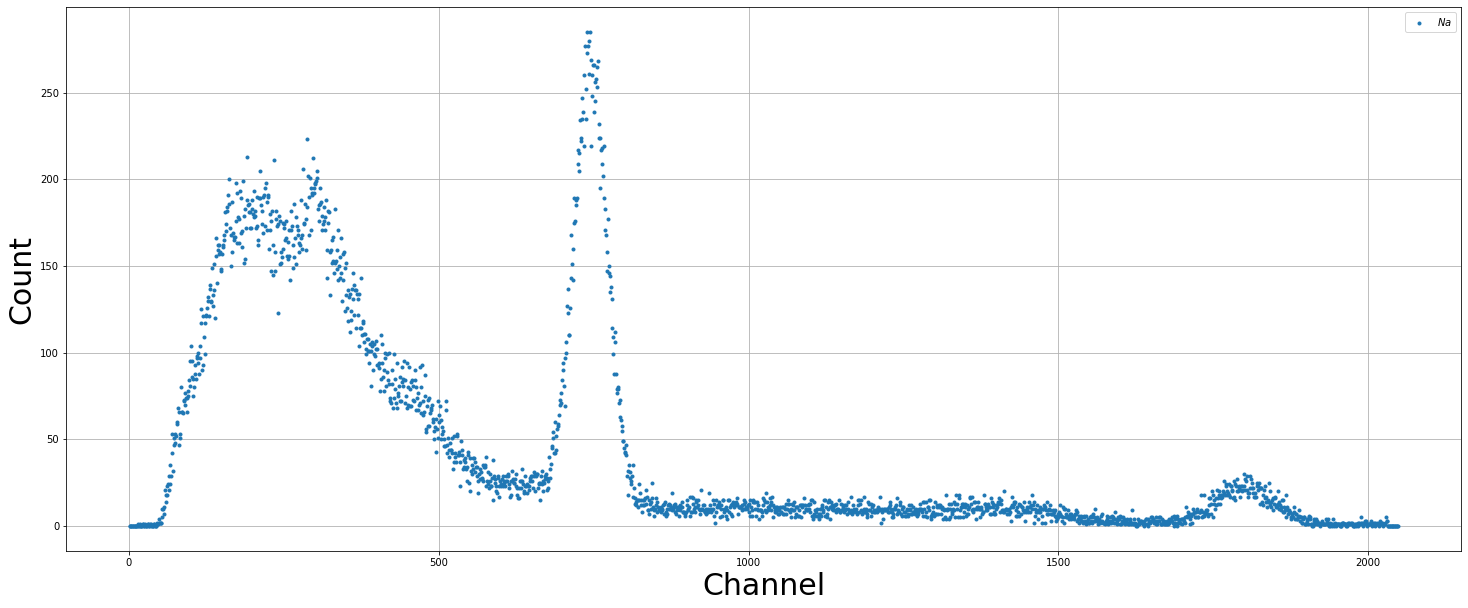

In [4]:
for frame in frames.values():
  fsz = 30
  axes = frame.plot(figsize=(25, 10), grid=True, style='.')
  axes.set_ylabel('Count', fontsize=fsz)
  axes.set_xlabel('Channel', fontsize=fsz)

In [5]:
frames.keys()

dict_keys(['src/csv/Am.csv', 'src/csv/Background.csv', 'src/csv/Co.csv', 'src/csv/Cs.csv', 'src/csv/Eu.csv', 'src/csv/Na.csv'])

In [6]:
Na_maxs = [0, 0]
Cs_max = 0
back_name = f"src/csv/Background.csv"
back_fr_name = 'Background'
for name in ["Na.csv", "Cs.csv"]:
  pathname = f"src/csv/{name}"
  if name == 'Na.csv':
    mx = 0
    mx2 = 0
    for i in range(500, 1000): # find first max
      tmp1 = frames[pathname]["$Na$"][i]
      if tmp1 > mx:
        mx = tmp1
        Na_maxs[0] = i
      tmp2 = frames[pathname]["$Na$"][i + 1000]
      if tmp2 > mx2:
        mx2 = tmp2
        Na_maxs[1] = i + 1000
  else:
    mx = 0
    mx2 = 0
    for i in range(500, 1000): # find first max
      tmp1 = frames[pathname]['$Cs$'][i]
      if tmp1 > mx:
        mx = tmp1
        Cs_max = i

a = 0.7183795712484237 +- 0.02201675501656119 kEv
b = -17.320302648171094 +- 4.7600367049427765 kEv


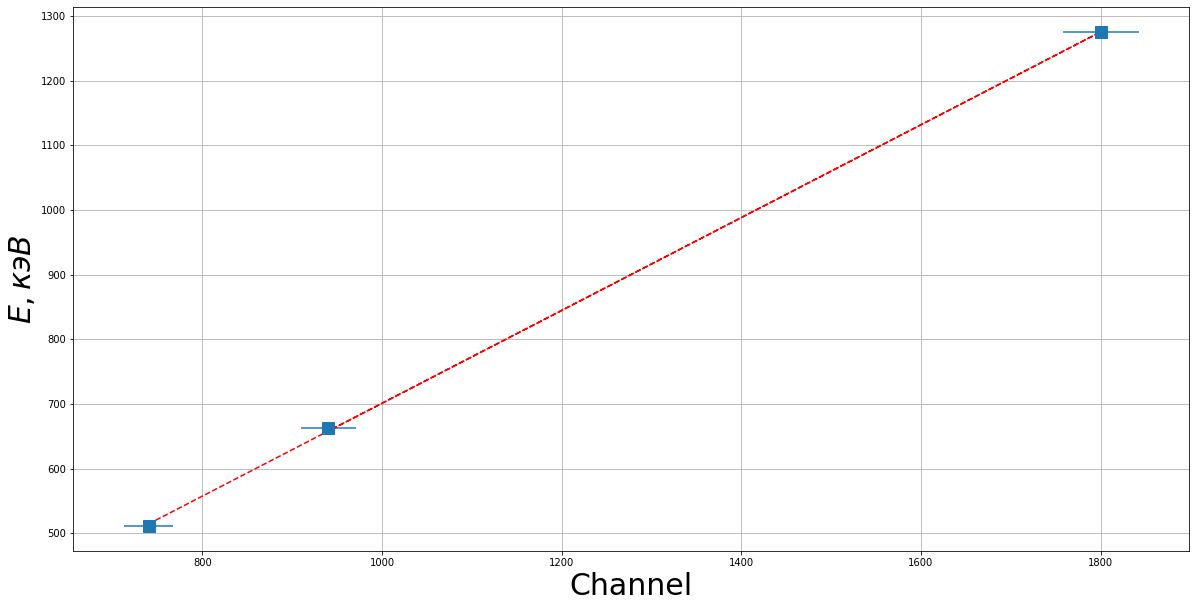

In [7]:
maxes = np.array([*Na_maxs, Cs_max])
energies = np.array([511, 1275, 662]) # keV
trend = np.poly1d(np.polyfit(maxes, energies, 1))

plt.figure(figsize=[20, 10])
plt.errorbar(maxes, energies, xerr=np.sqrt(maxes), yerr=[0.1] * maxes.shape[0], marker='s', markersize=12, ls="")
plt.plot(maxes, trend(maxes), 'r--')
plt.xlabel('Channel', fontsize=fsz)
plt.ylabel('$E, кэВ$', fontsize=fsz)
plt.grid()
'y = ax + b'
a = trend[1]
b = trend[0]
da = 1 / np.sqrt(3) * np.sqrt(
  (np.mean(energies * energies) - np.mean(energies) ** 2) / 
  (np.mean(maxes * maxes) - np.mean(maxes) ** 2) 
  - a * a
)
db = da * np.sqrt(np.mean(maxes * maxes))
dE = 0.1
dd = np.sqrt((dE / maxes)**2 + (energies * np.sqrt(maxes) / maxes ** 2)**2)
db = np.sqrt(db ** 2 + np.mean(dd) ** 2)
da = np.sqrt(da ** 2 + np.mean(dd) ** 2)
print(f'a = {a} +- {da} kEv')
print(f'b = {b} +- {db} kEv')

In [8]:
# Cobalt
fr = frames["src/csv/Co.csv"]
arr = fr.values.transpose()
idxs = [
  np.argmax(arr[0][1500:1750]) + 1500,
  np.argmax(arr[0][1750:2000]) + 1750
]
np.argmax(arr[0])

219

In [9]:
maxes = np.append(maxes, idxs)

In [10]:
# Am
fr = frames["src/csv/Am.csv"]
arr = fr.values.transpose()
idxs = [
  np.argmax(arr[0]) 
]
idxs

[132]

In [11]:
maxes = np.append(maxes, idxs)

In [12]:
maxes

array([ 740, 1800,  940, 1657, 1865,  132])

In [13]:
# Eu
fr = frames["src/csv/Eu.csv"]
arr = fr.values.transpose()
idxs = [
  np.argmax(arr[0]),
  np.argmax(arr[0][150:250]) + 150,
  np.argmax(arr[0][250:500]) + 250
]
idxs

[99, 216, 378]

In [14]:
maxes = np.append(maxes, idxs)

In [15]:
delta_E = np.sqrt(db ** 2 + a * maxes * a + (maxes * da)**2)
E_i = a * maxes + b
E_t = np.array([
    511,
    1275,
    661,
    1173,
    1332,
    595,
    122,
    245,
    344
  ])
#assert E_t.shape[0] == maxes.shape[0] 
data = {
  "N_i" : maxes,
  "\sigma_{N_i}" : np.sqrt(maxes),
  "E_i" : E_i,
  "\sigma_{E_i}" : delta_E, 
  "R_i" : delta_E / E_i,
  "\\sigma_{R_i}": (delta_E / E_i)**2
  #"E_{теор}": E_t
}
df = pd.DataFrame(data)
df.index = [
  "^{22}\\text{Na}",
  "^{22}\\text{Na}",
  "^{137}\\text{Cs}",
  "^{60}\\text{Co}",
  "^{60}\\text{Co}",
  "^{241}\\text{Am}",
  "^{152}\\text{Eu}",
  "^{152}\\text{Eu}",
  "^{152}\\text{Eu}",
]
#maxes.shape[0]
df

,N_i,\sigma_{N_i},E_i,\sigma_{E_i},R_i,\sigma_{R_i}
^{22}\text{Na},740,27.202941,514.280580,25.884192,0.050331,0.002533
^{22}\text{Na},1800,42.426407,1275.762926,50.220833,0.039365,0.001550
^{137}\text{Cs},940,30.659419,657.956494,30.595376,0.046501,0.002162
^{60}\text{Co},1657,40.706265,1173.034647,46.996847,0.040064,0.001605
^{60}\text{Co},1865,43.185646,1322.457598,51.683200,0.039081,0.001527
^{241}\text{Am},132,11.489125,77.505801,9.961182,0.128522,0.016518
^{152}\text{Eu},99,9.949874,53.799275,8.860006,0.164686,0.027122
^{152}\text{Eu},216,14.696938,137.849685,12.519777,0.090822,0.008249
^{152}\text{Eu},378,19.442222,254.227175,16.940878,0.066637,0.004440


In [16]:
df.to_csv("src/csv/picks.csv")

 
1.035 x - 23.16
a = 1.0351745424302297 +- 0.05721408023303328


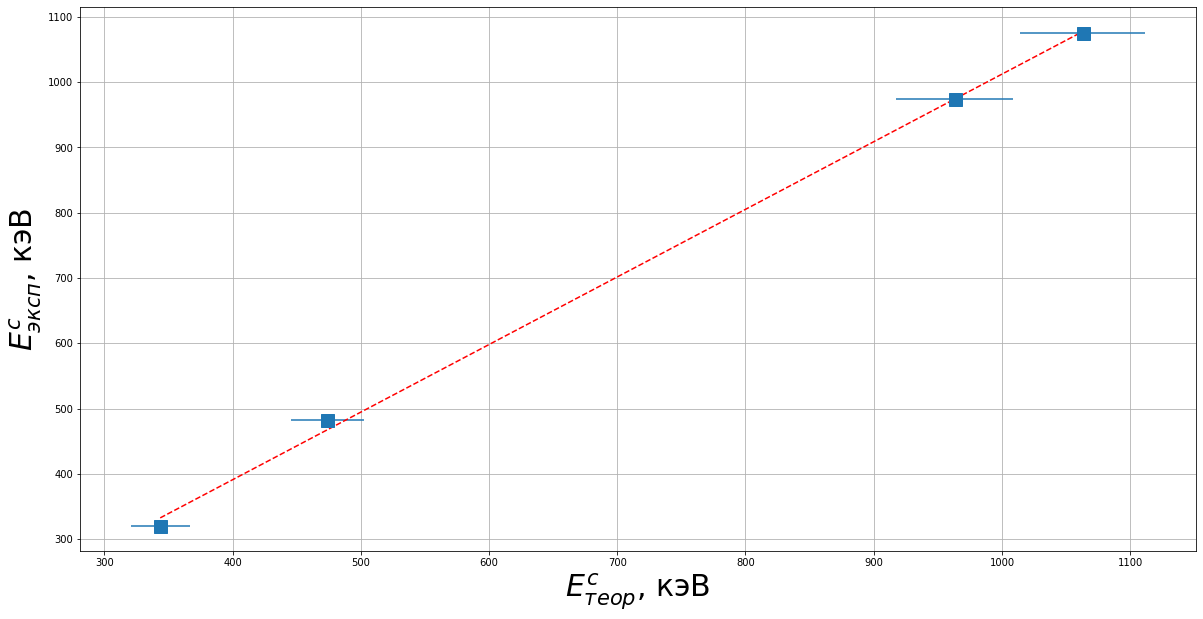

In [17]:
to_comp = df.iloc[0:4, 2:4].sort_values(by=["E_i"])
EE = to_comp[to_comp.columns[0]]
sigmaEE = to_comp[to_comp.columns[-1]]
mc2 = 511

to_comp["E^c_{эксп}"] = [
  320.5,
  482.2,
  973.3,
  1075
]
to_comp["\\sigma_{E^c_{эксп}}"] = [0.1] * len(EE)
to_comp["E^c_{теор}"] = EE / (1 + mc2 / (2 * EE))
to_comp["\\sigma_{E^c_{теор}}"] = abs(
  sigmaEE / (1 + mc2 / (2 * EE)) + EE / (1 + mc2 / (2 * EE))**2 * mc2 * sigmaEE / (2 * EE**2) 
)
## build plot
trend = np.poly1d(np.polyfit(to_comp["E^c_{теор}"], to_comp["E^c_{эксп}"], 1))

plt.figure(figsize=[20, 10])
plt.errorbar(
  x=to_comp["E^c_{теор}"],
  y=to_comp["E^c_{эксп}"],
  xerr=to_comp["\\sigma_{E^c_{теор}}"],
  yerr=to_comp["\\sigma_{E^c_{эксп}}"],
  marker="s", markersize=13, ls=""
)
plt.plot(to_comp["E^c_{теор}"], trend(to_comp["E^c_{теор}"]), "r--")
plt.grid()
plt.xlabel('$E^c_{теор}$, кэВ', fontsize=fsz)
plt.ylabel('$E^c_{эксп}$, кэВ', fontsize=fsz)
print(trend)
y = to_comp["E^c_{эксп}"]
x = to_comp["E^c_{теор}"]
xerr=to_comp["\\sigma_{E^c_{теор}}"]
yerr=to_comp["\\sigma_{E^c_{эксп}}"]
'y = ax + b'
a = trend[1]
b = trend[0]
da = 1 / np.sqrt(3) * np.sqrt(
  (np.mean(y * y) - np.mean(y) ** 2) / 
  (np.mean(x * x) - np.mean(x) ** 2) 
  - a * a
)
dd = np.sqrt(
  (yerr / x) ** 2 + 
  (y * xerr / x**2)**2
)
print(f"a = {a} +- {np.sqrt(da**2 + np.mean(dd)**2)}")
to_comp.round(1).to_csv("src/csv/comp.csv")

In [18]:
to_comp

,E_i,\sigma_{E_i},E^c_{эксп},\sigma_{E^c_{эксп}},E^c_{теор},\sigma_{E^c_{теор}}
^{22}\text{Na},514.280580,25.884192,320.5,0.1,343.584291,23.032632
^{137}\text{Cs},657.956494,30.595376,482.2,0.1,473.921584,28.201720
^{60}\text{Co},1173.034647,46.996847,973.3,0.1,963.231998,45.493467
^{22}\text{Na},1275.762926,50.220833,1075.0,0.1,1062.894566,48.822643


 
1.386 x - 0.0001713
a = 1.3855759608482072 +- 0.25286996159990804


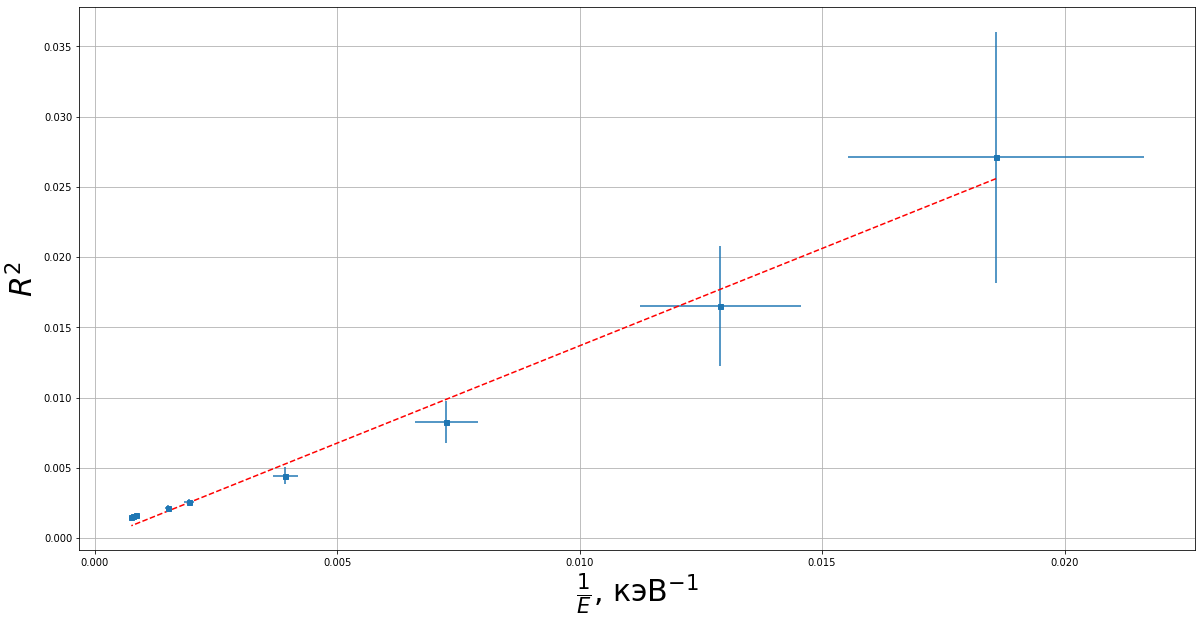

In [19]:
REdf = df.iloc[:, 2:].sort_values(by=["E_i"])
x = 1/REdf["E_i"]
xerr = REdf["\\sigma_{E_i}"] * x**2
y = REdf["R_i"]**2 
yerr = 2 * REdf["R_i"] * REdf["\\sigma_{R_i}"]

plt.figure(figsize=[20, 10])
plt.errorbar(
  x=x, y=y, xerr=xerr, yerr=yerr, marker="s", markersize=5, ls=""
)
plt.xlabel("$\\frac{1}{E}$, кэВ$^{-1}$", fontsize=fsz)
plt.ylabel("$R^2$", fontsize=fsz)
trend = np.poly1d(np.polyfit(x, y, 1))
plt.plot(x, trend(x), "r--")
plt.grid()
print(trend)
a = trend[1]
b = trend[0]
da = 1 / np.sqrt(3) * np.sqrt(
  (np.mean(y * y) - np.mean(y) ** 2) / 
  (np.mean(x * x) - np.mean(x) ** 2) 
  - a * a
)
dd = np.sqrt(
  (yerr / x) ** 2 + 
  (y * xerr / x**2)**2
)
print(f"a = {a} +- {np.sqrt(da**2 + np.mean(dd)**2)}")
REdf.round(4).to_csv("src/csv/R2E.csv")

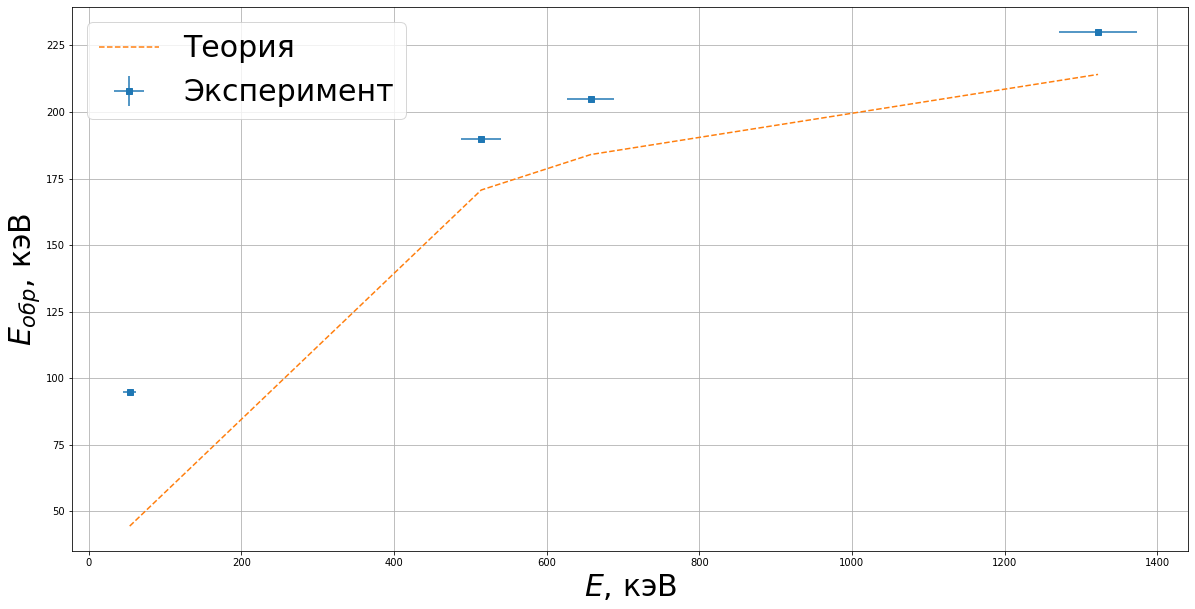

In [20]:
revdf = df.iloc[0:7:2, 2:4].sort_values(by=["E_i"])
x =  revdf["E_i"]
xerr = revdf["\\sigma_{E_i}"]
mc2 = 511
revdf["E_{обр}"] = [95, 190, 205, 230]
revdf["\\sigma_{E_{обр}}"] = [0.1] * 4
y = revdf["E_{обр}"]
yerr = revdf["\\sigma_{E_{обр}}"]
plt.figure(figsize=[20, 10])

plt.errorbar(
  x=x, y=y, xerr=xerr, yerr=yerr, ls="", marker="s",
  label="Эксперимент"
)
fsiz = fsz
plt.xlabel("$E$, кэВ", fontsize=fsiz)
plt.ylabel("$E_{обр}$, кэВ", fontsize=fsiz)

trend = np.poly1d(np.polyfit(x, y, 3))
plt.plot(x, x / (1 + 2 * x / mc2), "--",  label="Теория")
plt.legend(fontsize=fsiz)
plt.grid()

In [21]:
revdf.round(1).to_csv("src/csv/rev.csv")